In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Roshan Salunke\Downloads\Data Science Course\british air\task 2\customer_booking.csv",encoding_errors='ignore')

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df['num_passengers'].unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8], dtype=int64)

In [8]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [10]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [11]:
df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [12]:
df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Runion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (B

In [13]:
(df['booking_complete'].value_counts())

0    42522
1     7478
Name: booking_complete, dtype: int64

In [14]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0


In [15]:
df['booking_lead_time'] = df['purchase_lead']-df['flight_day']

In [16]:
df['is_weekend_flight'] = [1 if flight_day>5 else 0 for flight_day in df['flight_day']]

<AxesSubplot:xlabel='booking_complete', ylabel='Density'>

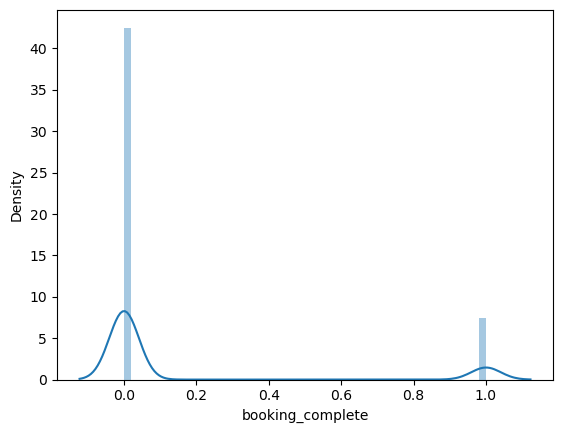

In [17]:
sns.distplot(df['booking_complete'])

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i] = le.fit_transform(df[i])

In [20]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,booking_lead_time,is_weekend_flight
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0,256,1
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0,106,1
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0,240,0
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0,90,1
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0,65,0


In [21]:
x = df.drop('booking_complete',axis=1)
y = df['booking_complete']

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xcols = x.columns
x = sc.fit_transform(x)
x = pd.DataFrame(x, columns=xcols)
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_lead_time,is_weekend_flight
0,0.400684,-0.355785,0.095325,1.957530,-0.119353,-0.381764,1.096754,-1.724217,0.694095,0.703747,-0.649919,-0.863497,-1.174175,1.934454,1.744518
1,-0.579559,-0.355785,0.095325,0.299164,-0.089844,-1.120780,1.096754,-1.724217,0.694095,-1.420965,-0.649919,-0.863497,-1.174175,0.275155,1.744518
2,0.400684,-0.355785,0.095325,1.747470,-0.030824,1.465775,-0.408687,-1.724217,-0.069108,0.703747,1.538654,-0.863497,-1.174175,1.757463,-0.573224
3,-0.579559,-0.355785,0.095325,0.122272,0.234761,-0.936026,1.096754,-1.724217,0.694095,-1.420965,-0.649919,1.158082,-1.174175,0.098163,1.744518
4,0.400684,-0.355785,0.095325,-0.187290,-0.030824,1.096267,-0.408687,-1.724217,-0.069108,0.703747,-0.649919,1.158082,-1.174175,-0.178386,-0.573224


In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [24]:
x_train.shape, x_test.shape

((40000, 15), (10000, 15))

In [25]:
y_train.shape, y_test.shape

((40000,), (10000,))

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [27]:
gb = GradientBoostingClassifier()
gb = gb.fit(x_train, y_train)
pred = gb.predict(x_test)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8526
           1       0.43      0.02      0.04      1474

    accuracy                           0.85     10000
   macro avg       0.64      0.51      0.48     10000
weighted avg       0.79      0.85      0.79     10000



In [29]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [30]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8526
           1       0.54      0.09      0.16      1474

    accuracy                           0.85     10000
   macro avg       0.70      0.54      0.54     10000
weighted avg       0.82      0.85      0.81     10000



In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
pred = lr.predict(x_test)

In [32]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8526
           1       0.00      0.00      0.00      1474

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



In [40]:
selector = RFE(RandomForestClassifier(),n_features_to_select=10)
fit = selector.fit(x, y)

In [41]:
def feature_ranks(X,Rank,Support):
    feature_rank=pd.DataFrame()
    for i in range(X.shape[1]):
        new =pd.DataFrame({"Features":X.columns[i],"Rank":Rank[i],'Selected':Support[i]},index=[i])
        feature_rank=pd.concat([feature_rank,new])
    return feature_rank

In [42]:
feature_rank_df = feature_ranks(x,fit.ranking_,fit.support_)

In [43]:
feature_rank_df

,Features,Rank,Selected
0,num_passengers,1,True
1,sales_channel,5,False
2,trip_type,6,False
3,purchase_lead,1,True
4,length_of_stay,1,True
5,flight_hour,1,True
6,flight_day,1,True
7,route,1,True
8,booking_origin,1,True
9,wants_extra_baggage,3,False


In [44]:
recursive_feature_names = feature_rank_df[feature_rank_df['Selected']==True]
recursive_feature_names

,Features,Rank,Selected
0,num_passengers,1,True
3,purchase_lead,1,True
4,length_of_stay,1,True
5,flight_hour,1,True
6,flight_day,1,True
7,route,1,True
8,booking_origin,1,True
11,wants_in_flight_meals,1,True
12,flight_duration,1,True
13,booking_lead_time,1,True


In [45]:
RFE_selected_feature = x[recursive_feature_names['Features'].values]
RFE_selected_feature

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_in_flight_meals,flight_duration,booking_lead_time
0,0.400684,1.957530,-0.119353,-0.381764,1.096754,-1.724217,0.694095,-0.863497,-1.174175,1.934454
1,-0.579559,0.299164,-0.089844,-1.120780,1.096754,-1.724217,0.694095,-0.863497,-1.174175,0.275155
2,0.400684,1.747470,-0.030824,1.465775,-0.408687,-1.724217,-0.069108,-0.863497,-1.174175,1.757463
3,-0.579559,0.122272,0.234761,-0.936026,1.096754,-1.724217,0.694095,1.158082,-1.174175,0.098163
4,0.400684,-0.187290,-0.030824,1.096267,-0.408687,-1.724217,-0.069108,1.158082,-1.174175,-0.178386
...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.640577,-0.502977,-0.012257,1.096754,1.443473,-1.046008,1.158082,-1.107368,-0.665114
49996,-0.579559,0.288108,-0.502977,-0.936026,1.598567,1.443473,-1.046008,-0.863497,-1.107368,0.253031
49997,-0.579559,-0.673744,-0.502977,2.389544,1.096754,1.443473,-1.046008,1.158082,-1.107368,-0.698300
49998,-0.579559,-0.773246,-0.502977,0.357251,-1.412314,1.443473,-1.046008,1.158082,-1.107368,-0.742548


In [46]:
x_train, x_test, y_train, y_test = train_test_split(RFE_selected_feature, y, test_size=.2)

In [47]:
x_train.shape, x_test.shape

((40000, 10), (10000, 10))

In [48]:
y_train.shape, y_test.shape

((40000,), (10000,))

In [49]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [50]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8482
           1       0.50      0.12      0.19      1518

    accuracy                           0.85     10000
   macro avg       0.68      0.55      0.56     10000
weighted avg       0.81      0.85      0.81     10000



## Second Part

In [51]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_lead_time,is_weekend_flight
0,0.400684,-0.355785,0.095325,1.957530,-0.119353,-0.381764,1.096754,-1.724217,0.694095,0.703747,-0.649919,-0.863497,-1.174175,1.934454,1.744518
1,-0.579559,-0.355785,0.095325,0.299164,-0.089844,-1.120780,1.096754,-1.724217,0.694095,-1.420965,-0.649919,-0.863497,-1.174175,0.275155,1.744518
2,0.400684,-0.355785,0.095325,1.747470,-0.030824,1.465775,-0.408687,-1.724217,-0.069108,0.703747,1.538654,-0.863497,-1.174175,1.757463,-0.573224
3,-0.579559,-0.355785,0.095325,0.122272,0.234761,-0.936026,1.096754,-1.724217,0.694095,-1.420965,-0.649919,1.158082,-1.174175,0.098163,1.744518
4,0.400684,-0.355785,0.095325,-0.187290,-0.030824,1.096267,-0.408687,-1.724217,-0.069108,0.703747,-0.649919,1.158082,-1.174175,-0.178386,-0.573224


In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  float64
 1   sales_channel          50000 non-null  float64
 2   trip_type              50000 non-null  float64
 3   purchase_lead          50000 non-null  float64
 4   length_of_stay         50000 non-null  float64
 5   flight_hour            50000 non-null  float64
 6   flight_day             50000 non-null  float64
 7   route                  50000 non-null  float64
 8   booking_origin         50000 non-null  float64
 9   wants_extra_baggage    50000 non-null  float64
 10  wants_preferred_seat   50000 non-null  float64
 11  wants_in_flight_meals  50000 non-null  float64
 12  flight_duration        50000 non-null  float64
 13  booking_lead_time      50000 non-null  float64
 14  is_weekend_flight      50000 non-null  float64
dtypes:

In [53]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [54]:
from imblearn.over_sampling import SMOTE

In [55]:
smote = SMOTE(random_state=42)
x, y = smote.fit_resample(x,y)

In [56]:
x.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_lead_time,is_weekend_flight
0,0.400684,-0.355785,0.095325,1.957530,-0.119353,-0.381764,1.096754,-1.724217,0.694095,0.703747,-0.649919,-0.863497,-1.174175,1.934454,1.744518
1,-0.579559,-0.355785,0.095325,0.299164,-0.089844,-1.120780,1.096754,-1.724217,0.694095,-1.420965,-0.649919,-0.863497,-1.174175,0.275155,1.744518
2,0.400684,-0.355785,0.095325,1.747470,-0.030824,1.465775,-0.408687,-1.724217,-0.069108,0.703747,1.538654,-0.863497,-1.174175,1.757463,-0.573224
3,-0.579559,-0.355785,0.095325,0.122272,0.234761,-0.936026,1.096754,-1.724217,0.694095,-1.420965,-0.649919,1.158082,-1.174175,0.098163,1.744518
4,0.400684,-0.355785,0.095325,-0.187290,-0.030824,1.096267,-0.408687,-1.724217,-0.069108,0.703747,-0.649919,1.158082,-1.174175,-0.178386,-0.573224


In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85044 entries, 0 to 85043
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         85044 non-null  float64
 1   sales_channel          85044 non-null  float64
 2   trip_type              85044 non-null  float64
 3   purchase_lead          85044 non-null  float64
 4   length_of_stay         85044 non-null  float64
 5   flight_hour            85044 non-null  float64
 6   flight_day             85044 non-null  float64
 7   route                  85044 non-null  float64
 8   booking_origin         85044 non-null  float64
 9   wants_extra_baggage    85044 non-null  float64
 10  wants_preferred_seat   85044 non-null  float64
 11  wants_in_flight_meals  85044 non-null  float64
 12  flight_duration        85044 non-null  float64
 13  booking_lead_time      85044 non-null  float64
 14  is_weekend_flight      85044 non-null  float64
dtypes:

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [93]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2,5,7,10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
best_model = grid_search.best_estimator_.

cv_score = cross_val_score(best_model, x_train, y_train, cv=5)
mean_cv_accuracy = cv_score.mean()
print('Cross validaiton accuracy: ',mean_cv_accuracy)

pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print('Testing accuracy: ',accuracy)

Cross validaiton accuracy:  0.9129418681560961
Testing accuracy:  0.9227467811158798


In [90]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)

In [91]:
pred = rf.predict(x_test)

In [61]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92      8564
           1       0.94      0.90      0.92      8445

    accuracy                           0.92     17009
   macro avg       0.92      0.92      0.92     17009
weighted avg       0.92      0.92      0.92     17009



In [74]:
def visualize_importance(feature_importances, feat_train_df):
    feature_importance_df = pd.DataFrame()
    
    _df = pd.DataFrame()
    
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df, _df])
    
    order = feature_importance_df.groupby('column')\
    .sum([['feature_importance']])\
    .sort_values('feature_importance', ascending=False).index[:50]
    
    fig, ax = plt.subplots(figsize=(6, max(4, len(order)*0.25)))
    sns.boxenplot(data=feature_importance_df,
                 x = 'feature_importance',
                 y='column',
                 order=order,
                 ax=ax,
                 palette='viridis',
                 orient='h')
    ax.tick_params(axis='x', rotation=0)
    ax.set_title(' Feature Importance')
    ax.grid()
    fig.tight_layout()
    return fig, ax

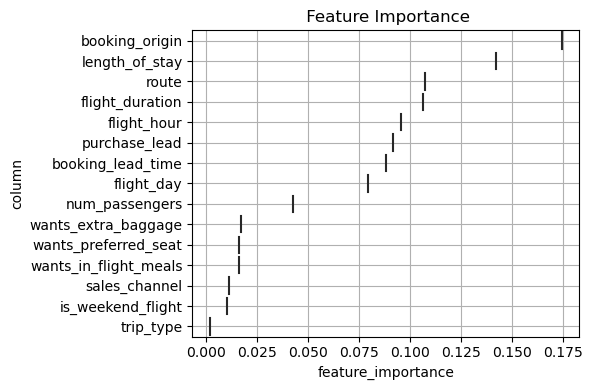

In [75]:
fig, ax = visualize_importance(rf.feature_importances_, x)

In [76]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
n_folds = 5
kf = KFold(n_splits=n_folds,shuffle=True )
accuracies = []
for train_index, test_index in kf.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(random_state=100)
    clf.fit(x_train, y_train)
    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    accuracies.append(accuracy)
    
average_accuracy = np.mean(accuracies)
print('Average Accuracy: ',average_accuracy)

Average Accuracy:  0.9179365420343288


In [77]:
clf.score(x_train, y_train),clf.score(x_test, y_test)

(0.9999412075959786, 0.9132173095014111)

In [78]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      8475
           1       0.93      0.89      0.91      8533

    accuracy                           0.91     17008
   macro avg       0.91      0.91      0.91     17008
weighted avg       0.91      0.91      0.91     17008



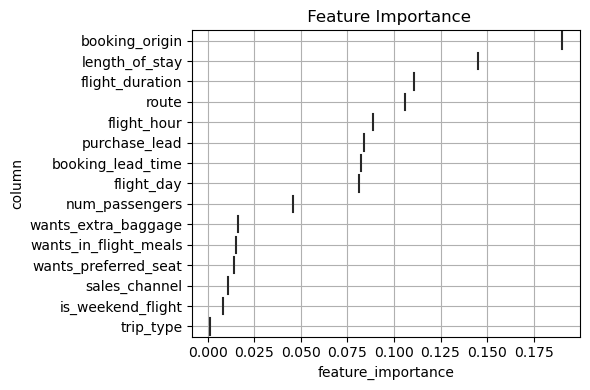

In [79]:
fig, ax = visualize_importance(clf.feature_importances_, x)

In [80]:
random.seed(42)
k = 7478
seindices = np.random.choice(x.shape[0],k,replace=True)
xunder = x.iloc[seindices]
yunder = y.iloc[seindices]

In [81]:
xunder.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_lead_time,is_weekend_flight
48984,-0.579559,-0.355785,0.095325,1.050957,-0.502977,-0.381764,0.093127,1.060711,-1.046008,-1.420965,-0.649919,-0.863497,1.037139,1.049495,-0.573224
71709,0.309491,-0.355785,0.095325,0.102217,-0.485816,-0.618082,-0.910501,-0.445785,1.693716,0.703747,1.538654,1.158082,-1.113583,0.122346,-0.573224
25223,0.400684,-0.355785,0.095325,1.979642,1.975825,-0.012257,-1.412314,1.694249,-1.046008,0.703747,-0.649919,1.158082,0.870121,2.011888,-0.573224
60709,-0.152001,-0.355785,0.095325,1.575400,-0.502977,0.599007,-1.193435,-1.499698,0.388814,0.703747,1.538654,1.158082,-0.081456,1.602595,-0.573224
60882,-0.579559,-0.355785,0.095325,0.271969,-0.561080,1.275282,-0.408687,0.749407,-0.057543,0.703747,-0.649919,-0.863497,-0.572911,0.281131,-0.573224


In [82]:
yunder.head()

48984    0
71709    1
25223    1
60709    1
60882    1
Name: booking_complete, dtype: int64

In [83]:
x_train, x_test, y_train, y_test = train_test_split(xunder, yunder, test_size=0.2)

In [84]:
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [85]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       749
           1       0.84      0.82      0.83       747

    accuracy                           0.83      1496
   macro avg       0.83      0.83      0.83      1496
weighted avg       0.83      0.83      0.83      1496

